# 引入模組

In [16]:
# 引入 numpy、pd 和 sklearn(scikit-learn) 模組
import numpy as np
import pandas as pd
from sklearn import datasets
# 引入 train_test_split 分割方法，
# 注意在 sklearn v0.18 後 train_test_split 從 sklearn.cross_validation 子模組搬到 sklearn.model_selection 中
from sklearn.model_selection import train_test_split
# 引入 KNeighbors 模型
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# 2. 引入資料集(load)並進行探索性資料分析(Exploratory data analysis)

In [2]:
# 引入 iris 資料集
raw_iris = datasets.load_iris()

# 探索性分析：了解資料集內容
# 先印出 key 值，列出有哪些值：['data', 'target', 'target_names', 'DESCR', 'feature_names']
# ‘data’, the data to learn -- X
# ‘target’, the classification labels -- y 分類標籤(目標值)
# ‘target_names’, the meaning of the labels -- 分類的標籤名稱
# ‘feature_names’, the meaning of the features -- 特徵
# ‘DESCR’, the full description of the dataset -- 資料及內容描述
print(raw_iris.keys())

# 印出 feature 值
print(raw_iris['data'])

# 印出目標值，分別對應的是三種花的類別：['setosa 山鳶尾' 'versicolor 變色鳶尾' 'virginica 維吉尼亞鳶尾']
print(raw_iris['target'])

# 印出目標標籤，三種花的類別：['setosa' 'versicolor' 'virginica']
print(raw_iris['target_names'])

# 印出屬性名稱，
# ['sepal length 花萼長度 (cm)', 'sepal width 花萼寬度 (cm)', 'petal length 花蕊/花瓣長度 (cm)', 'petal width 花蕊寬度 (cm)']
print(raw_iris['feature_names'])

# 印出資料集內容描述
print(raw_iris['DESCR'])

# 類別種類
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html
# https://www.tutorialspoint.com/numpy/numpy_unique.htm
print(np.unique(raw_iris.target))

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   

In [40]:
# 將資料轉為 pandas DataFrame
# data 為觀察目標變數
df_X = pd.DataFrame(raw_iris.data)

# target 為預測變數
df_y = pd.DataFrame(raw_iris.target)

df = pd.merge(df_X, df_y, left_index=True, right_index=True)
df = df.rename(columns={'0_x':'sepal length (cm)', 1: 'sepal width (cm)', 2:'petal length (cm)', 3:'petal width (cm)','0_y':'target_names'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## 敘述性統計
['setosa' 'versicolor' 'virginica']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [41]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 相關性分析

In [42]:
corr = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()


https://seaborn.pydata.org/generated/seaborn.heatmap.html

AttributeError: module 'seaborn' has no attribute 'plt'

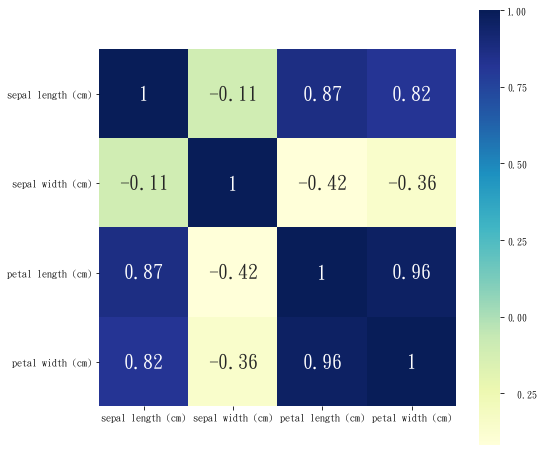

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['font.family']='DFKai-SB' #顯示中文(for Win10)
plt.figure(figsize=(8,8))
ax = sns.heatmap(corr, square=True, annot=True, cmap="YlGnBu", annot_kws={"size": 20})
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)

sns.plt.show()

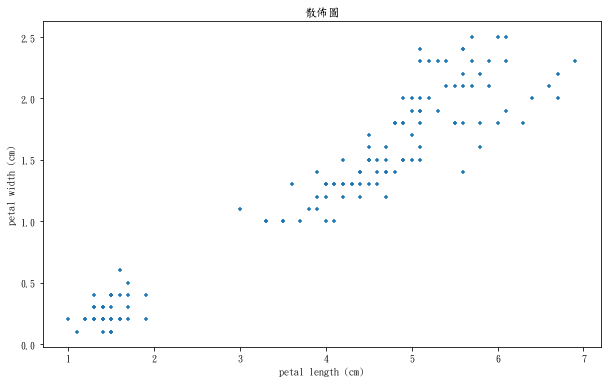

In [56]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x=2,y=3,marker='+')

# 3. 資料預處理與特徵工程 (Data Clean/Preprocessing & Feature Engineering)
良好的資料輸入 取決於資料預處理與特徵工程，

而好的輸入 將大大影響到模型是否可以發揮其理論正常水準。

以下把資料轉成 DataFrame 格式方便進行操作。

真正在進行機器學習工作流程的時候資料預處理往往是最花時間的部份。

同時為了方便模型的校調，我們這邊把資料集分為 70% 訓練資料，30% 驗證資料。

In [57]:
# 將資料切分為 training data 和 testing data，

# 其中 random_state 若設為 0 或不設則即便實例不同但因種子相同產生同樣隨機編號，若設為 1 則每次隨機產生不同編號
# test_size 為切分 training data 和 testing data 的比例
X_train, X_test, y_train, y_test = train_test_split(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], df[['target_names']], test_size=0.3)

In [62]:
y_train.head(5)

,target_names
119,2
46,0
124,2
80,1
134,2


### 4. 訓練模型與校調 (Model Training)
1. 樣本資料是否大於 50 筆：範例資料集總共有 150 筆資料，大於 50
2. 是否為分類問題：Iris 花朵類別預測是多類別分類問題
3. 是否有標籤好的資料：已經有 label 資料
4. 樣本資料是否小於 100K：資料小於 100K
5. 選擇 Linear SVC 模型（第一個選擇的模型）
6. 是否是文字資料：不是
7. 選擇 KNeighborsClassifier 模型（第二個選擇的模型）
8. 後續優化 / SVC / Ensemble

#### Linear SVC 模型（第一個選擇的模型）

In [21]:
# 初始化 LinearSVC 實例
lin_svc = LinearSVC()
# 使用 fit 來建置模型，其參數接收 training data matrix, testing data array，所以進行 y_train.values.ravel() Data Frame 轉換
# y_train.values.ravel()
lin_svc.fit(X_train, y_train())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [22]:
from sklearn import metrics

In [26]:
print(metrics.classification_report(y_test.values.ravel(), lin_svc.predict(X_test)))
print(metrics.confusion_matrix(y_test.values.ravel(), lin_svc.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.93      0.87      0.90        15
          2       0.88      0.93      0.90        15

avg / total       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]


In [27]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
y_train_std = sc.transform(X_test)

In [65]:
# 初始化 LinearSVC 實例
lin_svc = LinearSVC()
# 使用 fit 來建置模型，其參數接收 training data matrix, testing data array，所以進行 y_train.values.ravel() Data Frame 轉換
# y_train.values.ravel()
lin_svc.fit(X_train, y_train.values.ravel())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [66]:
print(metrics.classification_report(y_test.values.ravel(), lin_svc.predict(X_test)))
print(metrics.confusion_matrix(y_test.values.ravel(), lin_svc.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       1.00      0.94      0.97        18
          2       0.90      1.00      0.95         9

avg / total       0.98      0.98      0.98        45

[[18  0  0]
 [ 0 17  1]
 [ 0  0  9]]


#### KNeighborsClassifier 模型（第二個選擇的模型）

#### 後續優化 / SVC / Ensemble